# CryptoCurrency Prediction

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('/content/BTC-USD-2.csv')

In [72]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-16,9454.266602,9579.430664,9400.445313,9538.024414,9538.024414,2.156554e+10
1,2020-06-17,9533.784180,9540.422852,9327.339844,9480.254883,9480.254883,2.017771e+10
2,2020-06-18,9481.567383,9482.782227,9328.395508,9411.840820,9411.840820,1.777008e+10
3,2020-06-19,9410.293945,9440.875977,9274.295898,9288.018555,9288.018555,1.963222e+10
4,2020-06-20,9290.959961,9394.971680,9247.379883,9332.340820,9332.340820,1.713054e+10
...,...,...,...,...,...,...,...
361,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625,35552.515625,3.792423e+10
362,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375,39097.859375,4.066911e+10
363,2021-06-14,39016.968750,40978.363281,38757.285156,40536.070313,40536.070313,4.851313e+10
364,2021-06-15,40526.781250,41295.269531,39609.468750,40155.296875,40155.296875,4.023153e+10


In [73]:
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [74]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998656,0.997235,0.996689,0.996689,0.633576
High,0.998656,1.000000,0.997150,0.998577,0.998577,0.640906
Low,0.997235,0.997150,1.000000,0.998231,0.998231,0.611534
Close,0.996689,0.998577,0.998231,1.000000,1.000000,0.628110
Adj Close,0.996689,0.998577,0.998231,1.000000,1.000000,0.628110
Volume,0.633576,0.640906,0.611534,0.628110,0.628110,1.000000


In [78]:
df = data[['Date','Open','High','Low','Close']]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   Open    363 non-null    float64
 2   High    363 non-null    float64
 3   Low     363 non-null    float64
 4   Close   363 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


In [81]:
df['Date'] = pd.to_datetime(df['Date'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Open    363 non-null    float64       
 2   High    363 non-null    float64       
 3   Low     363 non-null    float64       
 4   Close   363 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


In [84]:
import plotly.graph_objects as go

In [91]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [17]:
pip install autots

     |████████████████████████████████| 460 kB 4.5 MB/s 


In [22]:
model = AutoTS(forecast_length=10,
    frequency='infer',
    ensemble='simple')

In [28]:
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
12/12 [==============================] - 6s 7ms/step - loss: 0.3852
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3687
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3494
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3295
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3096
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2990
Epoch 7/50
12/12 [==========

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 104: UnobservedComponents
Model Number: 105 with model NVAR in generation 0 of 10
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 106: FBProphet
Model Number: 107 with model Theta in generation 0 of 10
Model Number: 108 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='Use

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: IndexError('tuple index out of range') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Model Number: 134 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 134: DatepartRegression
Model Number: 135 with model Theta in generation 0 of 10
Model Number: 136 with model MultivariateRe

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 166 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 167 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 168 with model FBProphet in generation 1 of 10
Model Number: 169 with model NVAR in generation 1 of 10
Model Number: 170 with model NVAR in generation 1 of 10
Model Number: 171 with model NVAR in generation 1 of 10
Model Number: 172 with model NVAR in generation 1 of 10
Model Number: 173 with model ZeroesNaive in generation 1 of 10
Model Number: 174 with model ZeroesNaive in generation 1 of 10
Template Eval Error: KeyError(Timestamp('2020-06-16 00:00:00', freq='D')) in model 174: ZeroesNaive
Model Number: 175 with model ZeroesNaive in generation 1 of 10
Template Eval Error: Exception('Transformer SeasonalDifference failed on inverse') in model 175: ZeroesNaive
Model Number: 176 with model SeasonalNaive in generation 1 of 10
Model Number: 177 with model SeasonalNaive in generation 1 of 10
Model Number: 178 with model LastValueNaive in generation 1 of 10
Model Number: 179 with model LastValueNaive in generation 1 of 10
Model Number: 180 with model LastValueNaive in generati

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 240 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 240: FBProphet
Model Number: 241 with model FBProphet in generation 2 of 10
Model Number: 242 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 242: FBProphet
Model Number: 243 with model NVAR in generation 2 of 10
Model Number: 244 with model NVAR in generation 2 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 244: NVAR
Model Number: 245 with model NVAR in generation 2 of 10
Model Number: 246 with model ZeroesNaive in generation 2 of 10
Model Number: 247 with model ZeroesNaive in generation 2 of 10
Model Number: 248 with model ZeroesNaive in generation 2 of 10
Model Number: 249 with model LastValueNaive in generation 2 of 10
Model Number: 250 with model LastValueNaive in generation 2 of 10
Model Number: 251 with mod

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 312 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 313 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 314 with model FBProphet in generation 3 of 10
Model Number: 315 with model NVAR in generation 3 of 10
Model Number: 316 with model NVAR in generation 3 of 10
Model Number: 317 with model NVAR in generation 3 of 10
Model Number: 318 with model NVAR in generation 3 of 10
Model Number: 319 with model ZeroesNaive in generation 3 of 10
Model Number: 320 with model ZeroesNaive in generation 3 of 10
Model Number: 321 with model ZeroesNaive in generation 3 of 10
Model Number: 322 with model LastValueNaive in generation 3 of 10
Model Number: 323 with model LastValueNaive in generation 3 of 10
Model Number: 324 with model LastValueNaive in generation 3 of 10
Model Number: 325 with model SeasonalNaive in generation 3 of 10
Model Number: 326 with model SeasonalNaive in generation 3 of 10
Model Number: 327 with model SeasonalNaive in generation 3 of 10
Model Number: 328 with model SeasonalNaive in generation 3 of 10
Model Number: 329 with model WindowRegression in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 384 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 384: ARDL
Model Number: 385 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 385: ARDL
Model Number: 386 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 386: ARDL
Model Number: 387 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 387: ARDL
Model Number: 388 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 389 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 390 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 391 with model FBProphet in generation 4 of 10
Model Number: 392 with model NVAR in generation 4 of 10
Model Number: 393 with model NVAR in generation 4 of 10
Model Number: 394 with model NVAR in generation 4 of 10
Model Number: 395 with model NVAR in generation 4 of 10
Model Number: 396 with model ZeroesNaive in generation 4 of 10
Model Number: 397 with model ZeroesNaive in generation 4 of 10
Model Number: 398 with model ZeroesNaive in generation 4 of 10
Model Number: 399 with model LastValueNaive in generation 4 of 10
Model Number: 400 with model LastValueNaive in generation 4 of 10
Model Number: 401 with model LastValueNaive in generation 4 of 10
Model Number: 402 with model SeasonalNaive in generation 4 of 10
Model Number: 403 with model SeasonalNaive in generation 4 of 10
Model Number: 404 with model SeasonalNaive in generation 4 of 10
Model Number: 405 with model SeasonalNaive in generation 4 of 10
Model Number: 406 with model WindowRegression in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 462 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 463 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 464 with model FBProphet in generation 5 of 10
Model Number: 465 with model NVAR in generation 5 of 10
Model Number: 466 with model NVAR in generation 5 of 10
Model Number: 467 with model NVAR in generation 5 of 10
Model Number: 468 with model NVAR in generation 5 of 10
Model Number: 469 with model ZeroesNaive in generation 5 of 10
Model Number: 470 with model ZeroesNaive in generation 5 of 10
Model Number: 471 with model LastValueNaive in generation 5 of 10
Model Number: 472 with model LastValueNaive in generation 5 of 10
Model Number: 473 with model LastValueNaive in generation 5 of 10
Model Number: 474 with model SeasonalNaive in generation 5 of 10
Model Number: 475 with model SeasonalNaive in generation 5 of 10
Model Number: 476 with model SeasonalNaive in generation 5 of 10
Model Number: 477 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 477: UnobservedComponent

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 488 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 489 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 490 with model ETS in generation 5 of 10
Model Number: 491 with model ETS in generation 5 of 10
Model Number: 492 with model ETS in generation 5 of 10
Model Number: 493 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on inverse') in model 493: ETS
Model Number: 494 with model GLS in generation 5 of 10
Model Number: 495 with model GLS in generation 5 of 10
Model Number: 496 with model GLS in generation 5 of 10
Model Number: 497 with model GLM in generation 5 of 10
Model Number: 498 with model GLM in generation 5 of 10
Model Number: 499 with model GLM in generation 5 of 10
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') in model 499: GLM
Model Number: 500 with model GLM in generation 5 of 10
Model Number: 501 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=Tru

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 538 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 539 with model FBProphet in generation 6 of 10
Model Number: 540 with model AverageValueNaive in generation 6 of 10
Model Number: 541 with model AverageValueNaive in generation 6 of 10
Model Number: 542 with model NVAR in generation 6 of 10
Model Number: 543 with model NVAR in generation 6 of 10
Model Number: 544 with model NVAR in generation 6 of 10
Model Number: 545 with model NVAR in generation 6 of 10
Model Number: 546 with model ZeroesNaive in generation 6 of 10
Model Number: 547 with model ZeroesNaive in generation 6 of 10
Model Number: 548 with model ZeroesNaive in generation 6 of 10
Model Number: 549 with model LastValueNaive in generation 6 of 10
Model Number: 550 with model LastValueNaive in generation 6 of 10
Model Number: 551 with model LastValueNaive in generation 6 of 10
Model Number: 552 with model SeasonalNaive in generation 6 of 10
Model Number: 553 with model SeasonalNaive in generation 6 of 10
Model Number: 554 with model SeasonalNaive in generation 6 o

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 610 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 611 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 612 with model FBProphet in generation 7 of 10
Model Number: 613 with model AverageValueNaive in generation 7 of 10
Model Number: 614 with model AverageValueNaive in generation 7 of 10
Model Number: 615 with model NVAR in generation 7 of 10
Model Number: 616 with model NVAR in generation 7 of 10
Model Number: 617 with model NVAR in generation 7 of 10
Model Number: 618 with model ZeroesNaive in generation 7 of 10
Model Number: 619 with model ZeroesNaive in generation 7 of 10
Model Number: 620 with model LastValueNaive in generation 7 of 10
Model Number: 621 with model LastValueNaive in generation 7 of 10
Model Number: 622 with model LastValueNaive in generation 7 of 10
Model Number: 623 with model SeasonalNaive in generation 7 of 10
Model Number: 624 with model SeasonalNaive in generation 7 of 10
Model Number: 625 with model SeasonalNaive in generation 7 of 10
Model Number: 626 with model SeasonalNaive in generation 7 of 10
Model Number: 627 with model UnobservedComponents

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 684 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 685 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 686 with model FBProphet in generation 8 of 10
Model Number: 687 with model AverageValueNaive in generation 8 of 10
Model Number: 688 with model AverageValueNaive in generation 8 of 10
Model Number: 689 with model AverageValueNaive in generation 8 of 10
Model Number: 690 with model NVAR in generation 8 of 10
Model Number: 691 with model NVAR in generation 8 of 10
Model Number: 692 with model NVAR in generation 8 of 10
Model Number: 693 with model NVAR in generation 8 of 10
Model Number: 694 with model ZeroesNaive in generation 8 of 10
Model Number: 695 with model ZeroesNaive in generation 8 of 10
Model Number: 696 with model ZeroesNaive in generation 8 of 10
Model Number: 697 with model LastValueNaive in generation 8 of 10
Model Number: 698 with model LastValueNaive in generation 8 of 10
Model Number: 699 with model SeasonalNaive in generation 8 of 10
Model Number: 700 with model SeasonalNaive in generation 8 of 10
Model Number: 701 with model SeasonalNaive in generation 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 759 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 760 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 761 with model FBProphet in generation 9 of 10
Model Number: 762 with model AverageValueNaive in generation 9 of 10
Model Number: 763 with model AverageValueNaive in generation 9 of 10
Model Number: 764 with model AverageValueNaive in generation 9 of 10
Model Number: 765 with model NVAR in generation 9 of 10
Model Number: 766 with model NVAR in generation 9 of 10
Model Number: 767 with model NVAR in generation 9 of 10
Model Number: 768 with model NVAR in generation 9 of 10
Model Number: 769 with model ZeroesNaive in generation 9 of 10
Model Number: 770 with model ZeroesNaive in generation 9 of 10
Model Number: 771 with model LastValueNaive in generation 9 of 10
Model Number: 772 with model LastValueNaive in generation 9 of 10
Model Number: 773 with model LastValueNaive in generation 9 of 10
Model Number: 774 with model SeasonalNaive in generation 9 of 10
Model Number: 775 with model SeasonalNaive in generation 9 of 10
Model Number: 776 with model SeasonalNaive in generati

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: Exception('Transformer Detrend failed on fit') in model 832: ARDL
Model Number: 833 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 834 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 835 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 836 with model FBProphet in generation 10 of 10
Model Number: 837 with model AverageValueNaive in generation 10 of 10
Model Number: 838 with model AverageValueNaive in generation 10 of 10
Model Number: 839 with model AverageValueNaive in generation 10 of 10
Model Number: 840 with model NVAR in generation 10 of 10
Model Number: 841 with model NVAR in generation 10 of 10
Model Number: 842 with model NVAR in generation 10 of 10
Model Number: 843 with model NVAR in generation 10 of 10
Model Number: 844 with model ZeroesNaive in generation 10 of 10
Model Number: 845 with model ZeroesNaive in generation 10 of 10
Model Number: 846 with model ZeroesNaive in generation 10 of 10
Model Number: 847 with model LastValueNaive in generation 10 of 10
Model Number: 848 with model LastValueNaive in generation 10 of 10
Model Number: 849 with model LastValueNaive in generation 10 of 10
Model Number: 850 with model SeasonalNaive in generation 10 of 10
Model Number: 851 with model SeasonalNaiv

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 866 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 866: MultivariateRegression
Model Number: 867 with model MultivariateRegression in generation 10 of 10
Model Number: 868 with model GLS in generation 10 of 10
Model Number: 869 with model GLS in generation 10 of 10
Model Number: 870 with model GLS in generation 10 of 10
Model Number: 871 with model Ensemble in generation 11 of 0
Model Number: 872 with model Ensemble in generation 11 of 0
Model Number: 873 with model Ensemble in generation 11 of 0
Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0
Model Number: 876 with model Ensemble in generation 11 of 0
Model Number: 877 with model Ensemble in generation 11 of 0
Model Number: 878 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 132 with model Ensemble for Valid

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


50 - Theta with avg smape 3.42: 
Model Number: 51 of 132 with model FBProphet for Validation 1
51 - FBProphet with avg smape 6.53: 
Model Number: 52 of 132 with model ARDL for Validation 1
52 - ARDL with avg smape 7.88: 
Model Number: 53 of 132 with model WindowRegression for Validation 1
53 - WindowRegression with avg smape 6.56: 
Model Number: 54 of 132 with model Theta for Validation 1
54 - Theta with avg smape 12.35: 
Model Number: 55 of 132 with model Theta for Validation 1
55 - Theta with avg smape 12.35: 
Model Number: 56 of 132 with model Theta for Validation 1
56 - Theta with avg smape 12.22: 
Model Number: 57 of 132 with model ARDL for Validation 1
57 - ARDL with avg smape 8.58: 
Model Number: 58 of 132 with model Theta for Validation 1
58 - Theta with avg smape 7.77: 
Model Number: 59 of 132 with model ARDL for Validation 1
59 - ARDL with avg smape 21.58: 
Model Number: 60 of 132 with model WindowRegression for Validation 1
60 - WindowRegression with avg smape 10.77: 
Model 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


63 - FBProphet with avg smape 9.7: 
Model Number: 64 of 132 with model ARDL for Validation 1
64 - ARDL with avg smape 9.45: 
Model Number: 65 of 132 with model Theta for Validation 1
65 - Theta with avg smape 4.1: 
Model Number: 66 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


66 - FBProphet with avg smape 6.62: 
Model Number: 67 of 132 with model ARDL for Validation 1
67 - ARDL with avg smape 4.87: 
Model Number: 68 of 132 with model AverageValueNaive for Validation 1
68 - AverageValueNaive with avg smape 9.54: 
Model Number: 69 of 132 with model ARDL for Validation 1
69 - ARDL with avg smape 8.17: 
Model Number: 70 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


70 - FBProphet with avg smape 7.0: 
Model Number: 71 of 132 with model ARDL for Validation 1
71 - ARDL with avg smape 4.77: 
Model Number: 72 of 132 with model AverageValueNaive for Validation 1
72 - AverageValueNaive with avg smape 9.58: 
Model Number: 73 of 132 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 9.93: 
Model Number: 74 of 132 with model SeasonalNaive for Validation 1
74 - SeasonalNaive with avg smape 7.61: 
Model Number: 75 of 132 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 9.99: 
Model Number: 76 of 132 with model ARDL for Validation 1
76 - ARDL with avg smape 19.22: 
Model Number: 77 of 132 with model LastValueNaive for Validation 1
77 - LastValueNaive with avg smape 7.09: 
Model Number: 78 of 132 with model LastValueNaive for Validation 1
78 - LastValueNaive with avg smape 5.5: 
Model Number: 79 of 132 with model LastValueNaive for Validation 1
79 - LastValueNaive with avg smape 6.01: 
Model N

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


91 - FBProphet with avg smape 7.26: 
Model Number: 92 of 132 with model SeasonalNaive for Validation 1
92 - SeasonalNaive with avg smape 8.78: 
Model Number: 93 of 132 with model ZeroesNaive for Validation 1
93 - ZeroesNaive with avg smape 7.59: 
Model Number: 94 of 132 with model MultivariateRegression for Validation 1
94 - MultivariateRegression with avg smape 121.77: 
Model Number: 95 of 132 with model MultivariateRegression for Validation 1
95 - MultivariateRegression with avg smape 121.59: 
Model Number: 96 of 132 with model MultivariateRegression for Validation 1
96 - MultivariateRegression with avg smape 122.78: 
Model Number: 97 of 132 with model ETS for Validation 1
97 - ETS with avg smape 9.09: 
Model Number: 98 of 132 with model ETS for Validation 1
98 - ETS with avg smape 9.1: 
Model Number: 99 of 132 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


99 - FBProphet with avg smape 5.46: 
Model Number: 100 of 132 with model ETS for Validation 1
100 - ETS with avg smape 9.04: 
Model Number: 101 of 132 with model SeasonalNaive for Validation 1
101 - SeasonalNaive with avg smape 8.82: 
Model Number: 102 of 132 with model MultivariateRegression for Validation 1
102 - MultivariateRegression with avg smape 122.3: 
Model Number: 103 of 132 with model ETS for Validation 1
103 - ETS with avg smape 6.59: 
Model Number: 104 of 132 with model UnobservedComponents for Validation 1
104 - UnobservedComponents with avg smape 6.48: 
Model Number: 105 of 132 with model SeasonalNaive for Validation 1
105 - SeasonalNaive with avg smape 4.53: 
Model Number: 106 of 132 with model SeasonalNaive for Validation 1
106 - SeasonalNaive with avg smape 4.88: 
Model Number: 107 of 132 with model UnobservedComponents for Validation 1
107 - UnobservedComponents with avg smape 8.83: 
Model Number: 108 of 132 with model UnobservedComponents for Validation 1
108 - Unob

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - FBProphet with avg smape 8.26: 
Model Number: 112 of 132 with model WindowRegression for Validation 1
112 - WindowRegression with avg smape 8.33: 
Model Number: 113 of 132 with model ZeroesNaive for Validation 1
113 - ZeroesNaive with avg smape 4.23: 
Model Number: 114 of 132 with model ETS for Validation 1
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
114 - ETS with avg smape 6.48: 
Model Number: 115 of 132 with model ETS for Validation 1
115 - ETS with avg smape 8.38: 
Model Number: 116 of 132 with model MultivariateRegression for Validation 1
116 - MultivariateRegression with avg smape 9.4: 
Model Number: 117 of 132 with model WindowRegression for Validation 1
Epoch 1/50
11/11 [==============================] - 6s 12ms/step - loss: 0.0068
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


118 - MultivariateRegression with avg smape 4.14: 
Model Number: 119 of 132 with model FBProphet for Validation 1
119 - FBProphet with avg smape 18.04: 
Model Number: 120 of 132 with model MultivariateRegression for Validation 1
120 - MultivariateRegression with avg smape 4.52: 
Model Number: 121 of 132 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

121 - MultivariateRegression with avg smape 7.01: 
Model Number: 122 of 132 with model ZeroesNaive for Validation 1
122 - ZeroesNaive with avg smape 6.86: 
Model Number: 123 of 132 with model GLS for Validation 1


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


123 - GLS with avg smape 5.91: 
Model Number: 124 of 132 with model GLS for Validation 1
124 - GLS with avg smape 5.89: 
Model Number: 125 of 132 with model WindowRegression for Validation 1
125 - WindowRegression with avg smape 7.44: 
Model Number: 126 of 132 with model WindowRegression for Validation 1
126 - WindowRegression with avg smape 5.62: 
Model Number: 127 of 132 with model ZeroesNaive for Validation 1
127 - ZeroesNaive with avg smape 2.82: 
Model Number: 128 of 132 with model GLS for Validation 1
128 - GLS with avg smape 5.83: 
Model Number: 129 of 132 with model GLS for Validation 1
129 - GLS with avg smape 5.83: 
Model Number: 130 of 132 with model ZeroesNaive for Validation 1
130 - ZeroesNaive with avg smape 3.93: 
Model Number: 131 of 132 with model ZeroesNaive for Validation 1
131 - ZeroesNaive with avg smape 3.93: 
Model Number: 132 of 132 with model GLS for Validation 1
132 - GLS with avg smape 3.8: 
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for V

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


50 - Theta with avg smape 22.53: 
Model Number: 51 of 132 with model FBProphet for Validation 2
51 - FBProphet with avg smape 13.38: 
Model Number: 52 of 132 with model ARDL for Validation 2
52 - ARDL with avg smape 15.4: 
Model Number: 53 of 132 with model WindowRegression for Validation 2
53 - WindowRegression with avg smape 16.54: 
Model Number: 54 of 132 with model Theta for Validation 2
54 - Theta with avg smape 28.35: 
Model Number: 55 of 132 with model Theta for Validation 2
55 - Theta with avg smape 28.35: 
Model Number: 56 of 132 with model Theta for Validation 2
56 - Theta with avg smape 29.07: 
Model Number: 57 of 132 with model ARDL for Validation 2
57 - ARDL with avg smape 16.41: 
Model Number: 58 of 132 with model Theta for Validation 2
58 - Theta with avg smape 14.82: 
Model Number: 59 of 132 with model ARDL for Validation 2
59 - ARDL with avg smape 26.46: 
Model Number: 60 of 132 with model WindowRegression for Validation 2
60 - WindowRegression with avg smape 15.7: 
Mo

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


63 - FBProphet with avg smape 12.94: 
Model Number: 64 of 132 with model ARDL for Validation 2
64 - ARDL with avg smape 20.32: 
Model Number: 65 of 132 with model Theta for Validation 2
65 - Theta with avg smape 34.39: 
Model Number: 66 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


66 - FBProphet with avg smape 13.07: 
Model Number: 67 of 132 with model ARDL for Validation 2
67 - ARDL with avg smape 25.11: 
Model Number: 68 of 132 with model AverageValueNaive for Validation 2
68 - AverageValueNaive with avg smape 37.46: 
Model Number: 69 of 132 with model ARDL for Validation 2
69 - ARDL with avg smape 16.61: 
Model Number: 70 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


70 - FBProphet with avg smape 14.05: 
Model Number: 71 of 132 with model ARDL for Validation 2
71 - ARDL with avg smape 23.07: 
Model Number: 72 of 132 with model AverageValueNaive for Validation 2
72 - AverageValueNaive with avg smape 37.56: 
Model Number: 73 of 132 with model AverageValueNaive for Validation 2
73 - AverageValueNaive with avg smape 37.5: 
Model Number: 74 of 132 with model SeasonalNaive for Validation 2
74 - SeasonalNaive with avg smape 29.85: 
Model Number: 75 of 132 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 37.68: 
Model Number: 76 of 132 with model ARDL for Validation 2
76 - ARDL with avg smape 25.33: 
Model Number: 77 of 132 with model LastValueNaive for Validation 2
77 - LastValueNaive with avg smape 13.01: 
Model Number: 78 of 132 with model LastValueNaive for Validation 2
78 - LastValueNaive with avg smape 24.91: 
Model Number: 79 of 132 with model LastValueNaive for Validation 2
79 - LastValueNaive with avg smape 25.71

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


91 - FBProphet with avg smape 15.03: 
Model Number: 92 of 132 with model SeasonalNaive for Validation 2
92 - SeasonalNaive with avg smape 31.65: 
Model Number: 93 of 132 with model ZeroesNaive for Validation 2
93 - ZeroesNaive with avg smape 14.61: 
Model Number: 94 of 132 with model MultivariateRegression for Validation 2
94 - MultivariateRegression with avg smape 12.93: 
Model Number: 95 of 132 with model MultivariateRegression for Validation 2
95 - MultivariateRegression with avg smape 27.31: 
Model Number: 96 of 132 with model MultivariateRegression for Validation 2
96 - MultivariateRegression with avg smape 13.7: 
Model Number: 97 of 132 with model ETS for Validation 2
97 - ETS with avg smape 14.51: 
Model Number: 98 of 132 with model ETS for Validation 2
98 - ETS with avg smape 14.51: 
Model Number: 99 of 132 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


99 - FBProphet with avg smape 17.87: 
Model Number: 100 of 132 with model ETS for Validation 2
100 - ETS with avg smape 14.56: 
Model Number: 101 of 132 with model SeasonalNaive for Validation 2
101 - SeasonalNaive with avg smape 31.65: 
Model Number: 102 of 132 with model MultivariateRegression for Validation 2
102 - MultivariateRegression with avg smape 20.5: 
Model Number: 103 of 132 with model ETS for Validation 2
103 - ETS with avg smape 13.86: 
Model Number: 104 of 132 with model UnobservedComponents for Validation 2
104 - UnobservedComponents with avg smape 13.65: 
Model Number: 105 of 132 with model SeasonalNaive for Validation 2
105 - SeasonalNaive with avg smape 26.92: 
Model Number: 106 of 132 with model SeasonalNaive for Validation 2
106 - SeasonalNaive with avg smape 24.45: 
Model Number: 107 of 132 with model UnobservedComponents for Validation 2
107 - UnobservedComponents with avg smape 20.45: 
Model Number: 108 of 132 with model UnobservedComponents for Validation 2
108

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - FBProphet with avg smape 17.48: 
Model Number: 112 of 132 with model WindowRegression for Validation 2
112 - WindowRegression with avg smape 14.71: 
Model Number: 113 of 132 with model ZeroesNaive for Validation 2
113 - ZeroesNaive with avg smape 27.1: 
Model Number: 114 of 132 with model ETS for Validation 2
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
114 - ETS with avg smape 13.64: 
Model Number: 115 of 132 with model ETS for Validation 2
115 - ETS with avg smape 13.8: 
Model Number: 116 of 132 with model MultivariateRegression for Validation 2
116 - MultivariateRegression with avg smape 34.03: 
Model Number: 117 of 132 with model WindowRegression for Validation 2
Epoch 1/50
11/11 [==============================] - 6s 12ms/step - loss: 0.0059
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0057
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - l

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


118 - MultivariateRegression with avg smape 13.55: 
Model Number: 119 of 132 with model FBProphet for Validation 2
119 - FBProphet with avg smape 32.35: 
Model Number: 120 of 132 with model MultivariateRegression for Validation 2
120 - MultivariateRegression with avg smape 26.97: 
Model Number: 121 of 132 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

121 - MultivariateRegression with avg smape 16.21: 
Model Number: 122 of 132 with model ZeroesNaive for Validation 2
122 - ZeroesNaive with avg smape 17.31: 
Model Number: 123 of 132 with model GLS for Validation 2
123 - GLS with avg smape 12.73: 
Model Number: 124 of 132 with model GLS for Validation 2
124 - GLS with avg smape 12.71: 
Model Number: 125 of 132 with model WindowRegression for Validation 2
125 - WindowRegression with avg smape 15.31: 
Model Number: 126 of 132 with model WindowRegression for Validation 2
126 - WindowRegression with avg smape 13.18: 
Model Number: 127 of 132 with model ZeroesNaive for Validation 2
127 - ZeroesNaive with avg smape 20.76: 
Model Number: 128 of 132 with model GLS for Validation 2
128 - GLS with avg smape 12.6: 
Model Number: 129 of 132 with model GLS for Validation 2
129 - GLS with avg smape 12.6: 
Model Number: 130 of 132 with model ZeroesNaive for Validation 2
130 - ZeroesNaive with avg smape 25.33: 
Model Number: 131 of 132 with model Zero

In [93]:
prediction = model.predict()

In [95]:
forecast = prediction.forecast

In [96]:
df.tail(10)

,Date,Open,High,Low,Close
356,2021-06-07,35835.265625,36790.570313,33480.640625,33560.707031
357,2021-06-08,33589.519531,34017.386719,31114.443359,33472.632813
358,2021-06-09,33416.976563,37537.371094,32475.865234,37345.121094
359,2021-06-10,37389.515625,38334.324219,35847.593750,36702.597656
360,2021-06-11,36697.031250,37608.695313,36044.449219,37334.398438
361,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625
362,2021-06-13,35555.789063,39322.781250,34864.109375,39097.859375
363,2021-06-14,39016.968750,40978.363281,38757.285156,40536.070313
364,2021-06-15,40526.781250,41295.269531,39609.468750,40155.296875
365,2021-06-16,40023.757813,40472.218750,38562.894531,38692.386719


In [97]:
forecast

,Close
2021-06-17,39731.121079
2021-06-18,38978.630016
2021-06-19,38226.138952
2021-06-20,39264.873312
2021-06-21,38512.382249
2021-06-22,39551.116609
2021-06-23,38798.625545
2021-06-24,39837.359906
2021-06-25,39084.868842
2021-06-26,38332.377778


In [106]:
forecast = pd.DataFrame(forecast)
forecast = forecast.reset_index()

In [107]:
forecast.columns=['Date','Close']

In [108]:
forecast

,Date,Close
0,2021-06-17,39731.121079
1,2021-06-18,38978.630016
2,2021-06-19,38226.138952
3,2021-06-20,39264.873312
4,2021-06-21,38512.382249
5,2021-06-22,39551.116609
6,2021-06-23,38798.625545
7,2021-06-24,39837.359906
8,2021-06-25,39084.868842
9,2021-06-26,38332.377778


In [109]:
df1 =df.tail(10)

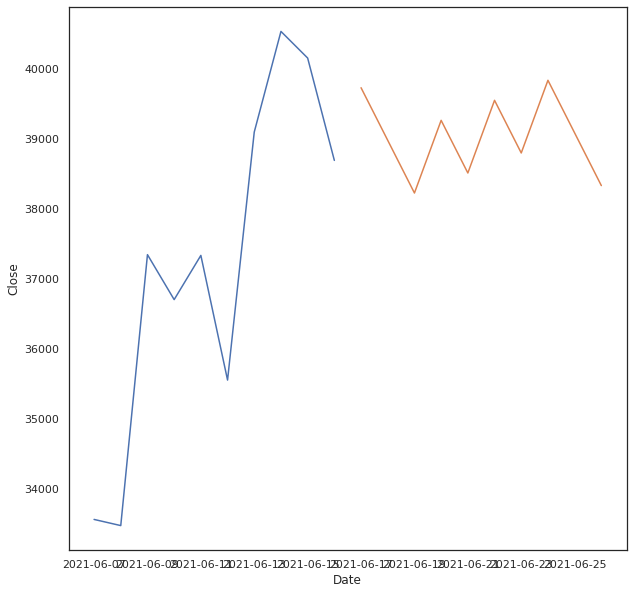

In [115]:
fig = plt.figure(figsize=(10,10))
sns.lineplot(x= df1['Date'],y=df1['Close'])
sns.lineplot(x=forecast['Date'],y=forecast['Close'])